# Binary Classification using PyTorch

## 1 Creating the data

In [1]:
import torch.cuda
from sklearn.datasets import make_circles
from torch.utils.benchmark.utils.compare import optional_min

n_sample=1000

X,y=make_circles(  n_samples =n_sample,noise=0.02,random_state=42)

In [2]:
len(X),len(y)

(1000, 1000)

In [3]:
X[:5],y[:5]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737]]),
 array([1, 1, 1, 1, 0]))

In [4]:
#2 input and 1 output
import pandas as pd
circles=pd.DataFrame({
    "X1": X[:,0],
    "X2": X[:,1],
    "Labels": y
})
circles

,X1,X2,Labels
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
...,...,...,...
995,0.241536,0.953294,0
996,-0.975298,-0.264479,0
997,-0.141235,-0.801951,1
998,0.675090,-0.754657,0


In [5]:
import matplotlib.pyplot as plt


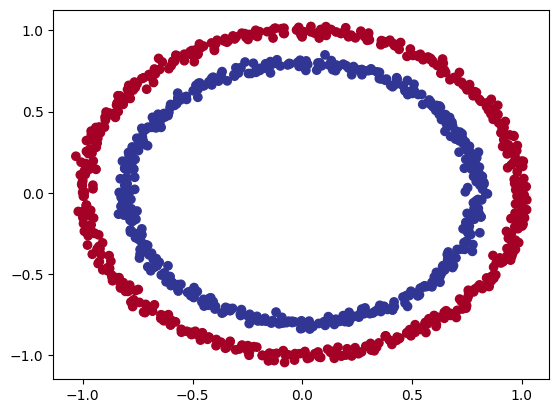

In [6]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
# training and splitting the data

train_split=int(0.8*len(X))

X_train=X[:train_split]
X_test=X[train_split:]

y_train=y[:train_split]
y_test=y[train_split:]

len(X_train),len(y_train),len(y_test),len(X_test)

(800, 800, 200, 200)

## Data exploring

In [8]:
X[:10],y[:10]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737],
        [-0.48452681,  0.66063343],
        [-0.01244985,  0.80221142],
        [ 0.77745843,  0.1418763 ],
        [-0.16613755, -0.79026518],
        [-0.12692063,  1.01115984]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [9]:
X.shape,y.shape

((1000, 2), (1000,))

## turn data into Tensor

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [11]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


In [12]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

## Training and building model

In [14]:
import torch
from torch import nn

In [15]:
class CircleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=5)    #takes input and give output to 5 features
        self.layer_2=nn.Linear(in_features=5,out_features=1)    #takes input from layer1 and give the output

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.layer_2(self.layer_1(x))



model_0=CircleClassifier().to(device)
model_0


CircleClassifier(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.1184, -0.2613],
                      [-0.0497, -0.6865],
                      [ 0.1911,  0.5614],
                      [ 0.5334, -0.0101],
                      [-0.1328,  0.0343]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.1318,  0.2524, -0.1004, -0.2363, -0.3291], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.4268, -0.0627, -0.4075, -0.3668, -0.0163]], device='cuda:0')),
             ('layer_2.bias', tensor([0.0938], device='cuda:0'))])

In [17]:
model_0_sequential=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1),
).to(device)



In [18]:
model_0_sequential.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6662,  0.1282],
                      [ 0.0924,  0.4997],
                      [-0.1020,  0.2228],
                      [-0.0608, -0.0980],
                      [-0.5818,  0.1051]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0682, -0.2697, -0.3113,  0.6803,  0.5754], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1030, -0.4230, -0.1131,  0.0485, -0.3445]], device='cuda:0')),
             ('1.bias', tensor([0.0512], device='cuda:0'))])

In [19]:
loss_fn=nn.BCEWithLogitsLoss()   #sigmoid+BCE_loss

optimizer=torch.optim.SGD(
    model_0.parameters(),
    lr=0.1
)


In [20]:
def accuracy_fn(y_true, y_preds):
    correct=torch.eq(y_true,y_preds)
    acc=(correct/len(y_preds))*100
    return acc

## Training the model


In [21]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=2000
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
model_0=CircleClassifier().to(device)
# model_0.to(device)
for epoch in range(epochs):
    model_0.train()

    # Forward Pass
    y_logits=model_0(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))

    #Calculate loss and accuracy
    loss=loss_fn(y_logits,   #expect y_logits not prediction
                 y_train)
    acc=accuracy_fn(y_train, y_preds)


    #optimerzer zero grad
    optimizer.zero_grad()

    #back-propagation
    loss.backward()

    #Gradiennt descent
    optimizer.step()

    #testing our data
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits=model_0(X_test).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))

        #calculate loss
        test_loss=loss_fn(test_logits,  #prediction
                          y_test       #accuracy
                          )
        test_acc=accuracy_fn(y_test, test_preds)
        if epoch%20 == 0:
            print(f"epoch: {epoch},loss: {loss:.4f} ")




epoch: 0,loss: 0.6957 
epoch: 20,loss: 0.6957 
epoch: 40,loss: 0.6957 
epoch: 60,loss: 0.6957 
epoch: 80,loss: 0.6957 
epoch: 100,loss: 0.6957 
epoch: 120,loss: 0.6957 
epoch: 140,loss: 0.6957 
epoch: 160,loss: 0.6957 
epoch: 180,loss: 0.6957 
epoch: 200,loss: 0.6957 
epoch: 220,loss: 0.6957 
epoch: 240,loss: 0.6957 
epoch: 260,loss: 0.6957 
epoch: 280,loss: 0.6957 
epoch: 300,loss: 0.6957 
epoch: 320,loss: 0.6957 
epoch: 340,loss: 0.6957 
epoch: 360,loss: 0.6957 
epoch: 380,loss: 0.6957 
epoch: 400,loss: 0.6957 
epoch: 420,loss: 0.6957 
epoch: 440,loss: 0.6957 
epoch: 460,loss: 0.6957 
epoch: 480,loss: 0.6957 
epoch: 500,loss: 0.6957 
epoch: 520,loss: 0.6957 
epoch: 540,loss: 0.6957 
epoch: 560,loss: 0.6957 
epoch: 580,loss: 0.6957 
epoch: 600,loss: 0.6957 
epoch: 620,loss: 0.6957 
epoch: 640,loss: 0.6957 
epoch: 660,loss: 0.6957 
epoch: 680,loss: 0.6957 
epoch: 700,loss: 0.6957 
epoch: 720,loss: 0.6957 
epoch: 740,loss: 0.6957 
epoch: 760,loss: 0.6957 
epoch: 780,loss: 0.6957 
epoch:

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


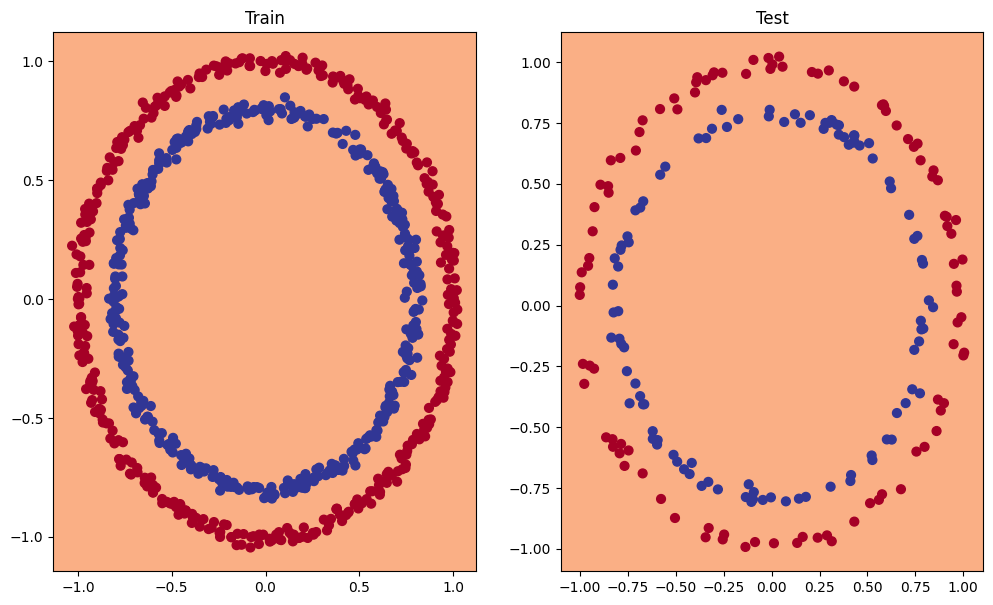

In [23]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


How to check if data fit in **Linear / Straight Line**
1. test it on Smaller Problem

In [24]:
model_1=nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [25]:
# Adding non-Linear dataset
class CircleClassifierV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()

    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_2=CircleClassifierV1().to(device)
model_2

CircleClassifierV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [26]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.3)

In [27]:
epochs=2000
# model_2=CircleClassifierV1().to(device)
for epoch in range(epochs):
    model_2.train()

    y_logits=model_2(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))
    loss=loss_fn(y_logits, y_train)
    acc=accuracy_fn(y_train, y_preds)


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_logits=model_2(X_test).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits, y_test )
        test_acc=accuracy_fn(y_test, test_preds)

    if(epoch%20 == 0):
        print(f"epoch: {epoch},loss: {loss:.4f} ")


epoch: 0,loss: 0.7026 
epoch: 20,loss: 0.6944 
epoch: 40,loss: 0.6938 
epoch: 60,loss: 0.6932 
epoch: 80,loss: 0.6927 
epoch: 100,loss: 0.6921 
epoch: 120,loss: 0.6912 
epoch: 140,loss: 0.6899 
epoch: 160,loss: 0.6889 
epoch: 180,loss: 0.6879 
epoch: 200,loss: 0.6865 
epoch: 220,loss: 0.6849 
epoch: 240,loss: 0.6828 
epoch: 260,loss: 0.6801 
epoch: 280,loss: 0.6765 
epoch: 300,loss: 0.6713 
epoch: 320,loss: 0.6648 
epoch: 340,loss: 0.6558 
epoch: 360,loss: 0.6422 
epoch: 380,loss: 0.6217 
epoch: 400,loss: 0.5913 
epoch: 420,loss: 0.5466 
epoch: 440,loss: 0.4851 
epoch: 460,loss: 0.5783 
epoch: 480,loss: 0.5465 
epoch: 500,loss: 0.5338 
epoch: 520,loss: 0.5054 
epoch: 540,loss: 0.4872 
epoch: 560,loss: 0.4683 
epoch: 580,loss: 0.4469 
epoch: 600,loss: 0.4226 
epoch: 620,loss: 0.3973 
epoch: 640,loss: 0.3619 
epoch: 660,loss: 0.3219 
epoch: 680,loss: 0.2100 
epoch: 700,loss: 0.1109 
epoch: 720,loss: 0.0820 
epoch: 740,loss: 0.0650 
epoch: 760,loss: 0.0530 
epoch: 780,loss: 0.0443 
epoch:

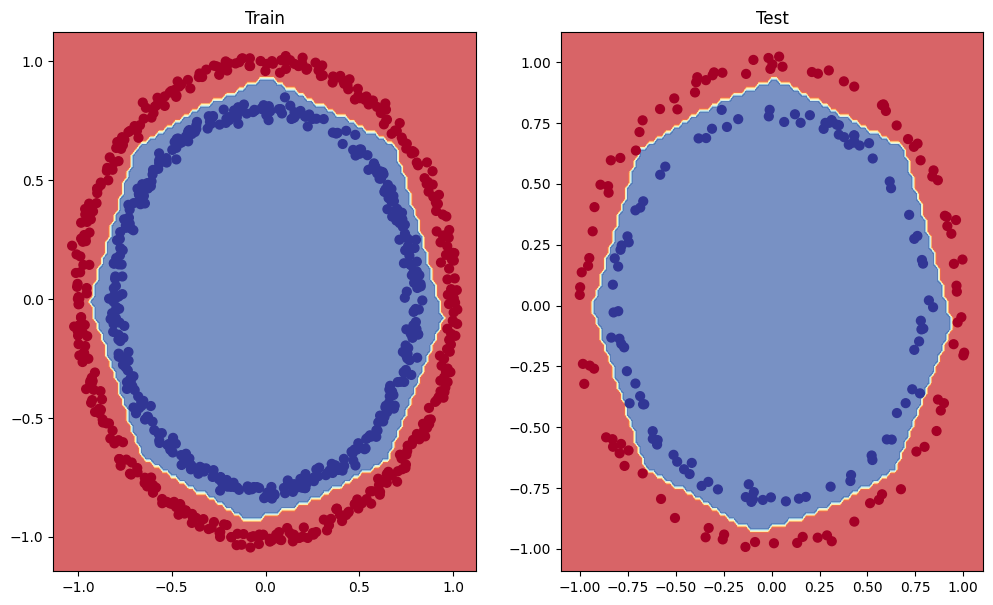

In [28]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

plt.show()


# Multiclass Classification using PyTorch

`12:46:00`